In [1]:
#This script imports the optimized electrode displacement sweep and analyzes 
#its response against open loop data with capacitance measurement and optitrack

import csv
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import bagpy
from tqdm.notebook import tqdm

In [2]:
opti_column = 7 #column in optitrack for displacement axis

opti_dir = 'CL_3/'
opti_name = 'PWM_discrete_09_14_'
opti_file = opti_dir + opti_name
extension = range(23,41,2)

In [3]:
def read_opti_data(optitrack_file):
    opti_data = np.array([[0,0]])

    with open(optitrack_file) as readfile:
        reader = csv.reader(readfile, delimiter=',')
        for i in range(opti_column + 1):
            next(reader)
        for line in tqdm(readfile):
            values = line.strip().split(',')
            if values[opti_column] == '':
                continue
            time_opti= float(values[1])
            disp_opti = float(values[opti_column]) * 1e3 #convert to mm
            opti_data = np.append(opti_data,[[time_opti, disp_opti]], axis = 0)

    #Zero array
    opti_data = opti_data[1:,:] - opti_data[1,:]
    opti_data[:,1] = -1*opti_data[:,1] #Flip to contraction

    start_index = np.argmax(np.diff(opti_data[:120*20,1])) #Test starts with biggest difference between 0 and 20 seconds

    opti_data[:,0] = opti_data[:,0] - opti_data[start_index,0] #re-zero time to start of test
    return opti_data

In [4]:
def plot_singlesp(opti_data, contraction):
    plt.figure(figsize=(3.25, 2), facecolor=(1, 1, 1),tight_layout=True)

    plt.plot(opti_data[:,0], opti_data[:,1], 'b.', markersize = 3, alpha = 1)

    plt.xlabel('Time (s)')
    plt.ylabel('Contraction (mm)')
    plt.grid('True')

    plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                                   'Lucida Grande', 'Verdana']

    plt.title('Setpoint for ' + opti_dir + str(contraction))
    write_name = 'length_vs_rmse' + str(contraction) + '.png'

    plt.savefig(fname=write_name, dpi=600, format=None, metadata=None,
            bbox_inches=None, pad_inches=0.1,
            facecolor='auto', edgecolor='auto',
            backend=None)

    plt.show()

0it [00:00, ?it/s]

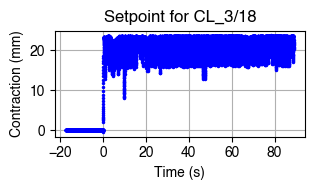

0it [00:00, ?it/s]

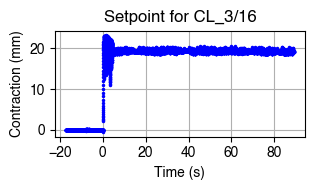

0it [00:00, ?it/s]

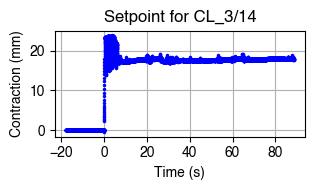

0it [00:00, ?it/s]

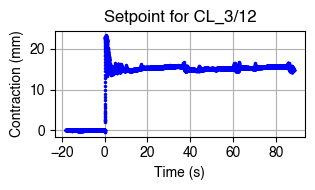

0it [00:00, ?it/s]

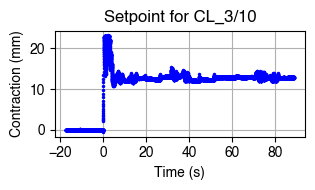

0it [00:00, ?it/s]

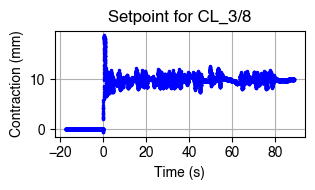

0it [00:00, ?it/s]

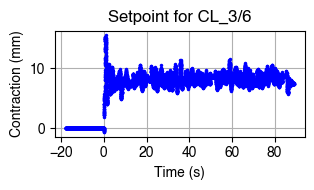

0it [00:00, ?it/s]

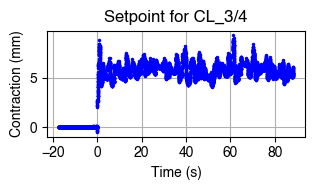

0it [00:00, ?it/s]

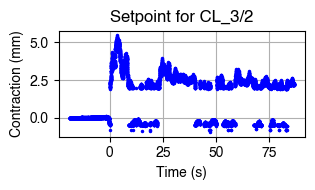

[21.366286239570076, 19.344329431673955, 17.72347260566387, 15.358109743883247, 12.807008548226243, 10.015259001984692, 8.237436412505303, 5.778623678948873, 1.5435538913362692]
[4.059197514241432, 3.3598198867100653, 3.730556372734424, 3.376986851303407, 2.8459739455369273, 2.118841944184221, 2.3805569399747046, 1.913756081722887, 1.3483337768749875]


In [5]:
rmse_array = []
length_array = []

for setpoint in extension:
        
    opti_data = read_opti_data(opti_file + str(setpoint) + 'mm.csv')
    
    plot_singlesp(opti_data, 41 - setpoint) #convert to contraction
        
    settle_time = 30
    settle_index = np.argmin(abs(opti_data[:,0] - settle_time))
    
    rmse = np.sqrt(np.mean((opti_data[settle_index:,1]-(41-setpoint))**2))
    rmse_array.append(rmse)
    
    length = np.mean(opti_data[settle_index:,1])
    length_array.append(length)

print(length_array)
print(rmse_array)
        

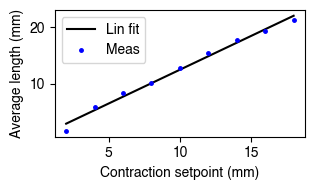

In [6]:
#Determine slope of length and linear fit

lin_fit = np.polynomial.polynomial.polyfit(41-np.array(extension), np.array(length_array), 1)
lin_plot = lin_fit[1]*(41-np.array(extension)) + lin_fit[0]

plt.figure(figsize=(3.25,2),facecolor=(1, 1, 1),tight_layout=True)

plt.plot(41-np.array(extension), lin_plot, 'k', markersize = 5, alpha = 1)
plt.plot(41-np.array(extension), np.array(length_array), 'b.', markersize = 5, alpha = 1)

plt.xlabel('Contraction setpoint (mm)')
plt.ylabel('Average length (mm)')
plt.legend(['Lin fit', 'Meas' ])

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

write_name = 'length_vs_setpoint'+ '.png'
    
plt.savefig(fname=write_name, dpi=600, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)


plt.show()

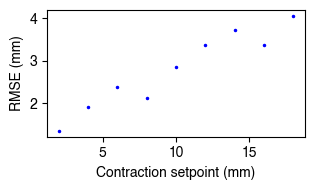

In [7]:
plt.figure(figsize=(3.25,2),facecolor=(1, 1, 1),tight_layout=True)

plt.plot(41-np.array(extension), rmse_array, 'b.', markersize = 3, alpha = 1)

plt.xlabel('Contraction setpoint (mm)')
plt.ylabel('RMSE (mm)')

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

write_name = 'length_vs_rmse' + opti_dir[:-1] + '.png'
    
plt.savefig(fname=write_name, dpi=600, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

plt.show()

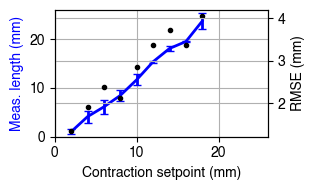

In [8]:
length_3 = [21.366286239570076, 19.344329431673955, 17.72347260566387, 15.358109743883247, 12.807008548226243, 10.015259001984692, 8.237436412505303, 5.778623678948873, 1.5435538913362692]
length_2 = [25.281005032563648, 19.53364477690984, 18.740806439985583, 15.64123487496639, 12.092285040774719, 7.9066007874015725, 4.960777087981372, 2.898441010481056, 0.29242021276595886]
length_1 = [24.556024875000002, 19.70469760594034, 17.850851837321823, 15.162136876994843, 10.205703953337649, 7.512451946472019, 5.204504226817533, 3.6886584835698817, 1.2424727536614322]

rmse_3 = [4.059197514241432, 3.3598198867100653, 3.730556372734424, 3.376986851303407, 2.8459739455369273, 2.118841944184221, 2.3805569399747046, 1.913756081722887, 1.3483337768749875]
rmse_2 = [8.268957728566201, 3.56457682444577, 4.751849552935726, 3.6572225196655754, 2.3551719002094487, 0.8305590244081827, 1.9363178667196648, 1.234718007556089, 1.7208752468578954]
rmse_1 = [7.697389774730459, 3.732519184880011, 3.8913052930533794, 3.1697885755868542, 0.8905896372679571, 0.959324588731578, 0.9337044002306147, 0.4371091744401432, 1.2171770756063862]

fig, ax1 = plt.subplots(figsize=(3.25,2),facecolor=(1, 1, 1),tight_layout=True)

(_, caps, _) = ax1.errorbar(x = 41-np.array(extension), y = np.mean([np.array(length_3),np.array(length_2),np.array(length_1)],0) , yerr = np.std([np.array(length_3), np.array(length_2),np.array(length_1)],0), lw=2, color='b', markersize=2, capsize=3)

plt.xlabel('Contraction setpoint (mm)')
ax1.set_xlim([0,26])
ax1.set_ylim([0,26])
ax1.set_ylabel('Meas. length (mm)', color='b')

for cap in caps:
    cap.set_markeredgewidth(1)

ax2 = ax1.twinx()
ax2.scatter(41-np.array(extension), rmse_3, color='k', marker='.')

ax2.set_ylabel('RMSE (mm)', color='k')


plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

plt.rcParams.update({'lines.markeredgewidth': 1})


write_name = 'length_vs_setpoint_alltakes.png'

for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid('True')
ax1.grid('True')
    
plt.savefig(fname=write_name, dpi=600, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, 
       )



plt.show()


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

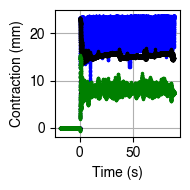

In [9]:
#Plot multiple on same plot
        
opti_data23 = read_opti_data(opti_file + str(23) + 'mm.csv')
opti_data29 = read_opti_data(opti_file + str(29) + 'mm.csv')
opti_data35 = read_opti_data(opti_file + str(35) + 'mm.csv')
    
plt.figure(figsize=(2, 2), facecolor=(1, 1, 1),tight_layout=True)

plt.plot(opti_data23[:,0], opti_data23[:,1], 'b.', markersize = 3, alpha = 1)
plt.plot(opti_data29[:,0], opti_data29[:,1], 'k.', markersize = 3, alpha = 1)
plt.plot(opti_data35[:,0], opti_data35[:,1], 'g.', markersize = 3, alpha = 1)

plt.xlabel('Time (s)')
plt.ylabel('Contraction (mm)')
plt.grid('True')

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                                   'Lucida Grande', 'Verdana']

write_name = 'multiple_sp_one_plot.png' 

plt.savefig(fname=write_name, dpi=600, format=None, metadata=None,
            bbox_inches=None, pad_inches=0.1,
            facecolor='auto', edgecolor='auto',
            backend=None)

plt.show()

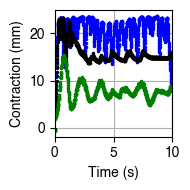

In [10]:
#Plot inset of same data
plt.figure(figsize=(2, 2), facecolor=(1, 1, 1),tight_layout=True)

plt.plot(opti_data23[:,0], opti_data23[:,1], 'b.', markersize = 3, alpha = 1)
plt.plot(opti_data29[:,0], opti_data29[:,1], 'k.', markersize = 3, alpha = 1)
plt.plot(opti_data35[:,0], opti_data35[:,1], 'g.', markersize = 3, alpha = 1)

plt.xlabel('Time (s)')
plt.ylabel('Contraction (mm)')
plt.grid('True')
plt.xlim([0,10])

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                                   'Lucida Grande', 'Verdana']

write_name = 'multiple_sp_one_plot_inset.png' 

plt.savefig(fname=write_name, dpi=600, format=None, metadata=None,
            bbox_inches=None, pad_inches=0.1,
            facecolor='auto', edgecolor='auto',
            backend=None)

plt.show()